In [4]:
!pip install llm


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [278]:
from openai import OpenAI
import os
import ast
import re
import json

from collections import defaultdict
from difflib import SequenceMatcher
import numpy as np
from scipy.cluster.hierarchy import fcluster
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [252]:
#data_importance = pd.read_csv("./plus0-ecosystem_mean_feature_importance_values-signed.tsv", header=0, sep="\t")
data_importance_orig = pd.read_csv("/Users/marcin/Documents/KBase/KE/MGnify/paper/pseudoabundance_vs_importance/ecosystem-feature-shap-pabund-corr.tsv", header=0, index_col=0, sep="\t")
data_importance_orig

,GO:0000502 proteasome complex,GO:0001510 RNA methylation,GO:0003950 NAD+ ADP-ribosyltransferase activity,GO:0003968 RNA-dependent RNA polymerase activity,GO:0004037 allantoicase activity,"GO:0004114 3',5'-cyclic-nucleotide phosphodiesterase activity",GO:0004122 cystathionine beta-synthase activity,GO:0004144 diacylglycerol O-acyltransferase activity,GO:0004352 glutamate dehydrogenase (NAD+) activity,GO:0004521 RNA endonuclease activity,...,sk__Bacteria;k__;p__Proteobacteria;c__Epsilonproteobacteria;o__Campylobacterales;f__Campylobacteraceae;g__Arcobacter,sk__Bacteria;k__;p__Spirochaetes;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Treponema;s__Treponema_porcinum,sk__Bacteria;k__;p__Tenericutes;c__Mollicutes,sk__Bacteria;k__;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Candidatus_Udaeobacter,sk__Bacteria;k__;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,sk__Eukaryota;k__;p__;c__Dinophyceae;o__Suessiales;f__Symbiodiniaceae;g__Symbiodinium,sk__Eukaryota;k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae,sk__Eukaryota;k__Fungi;p__Basidiomycota;c__Ustilaginomycetes;o__Ustilaginales;f__Ustilaginaceae,sk__Eukaryota;k__Metazoa;p__Annelida;c__Polychaeta;o__Terebellida,sk__Eukaryota;k__Metazoa;p__Arthropoda;c__Ostracoda;o__Halocyprida
Ecosystem,,,,,,,,,,,,,,,,,,,,,
root:Engineered:Bioreactor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Bioremediation:Terephthalate:Wastewater,0.000000,0.000000,0.000000,0.000000,0.542480,0.579543,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Built environment,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.865282,0.000000,0.000000,0.000000
root:Engineered:Food production,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Food production:Dairy products,0.000000,0.929234,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Food production:Fermented beverages,0.000000,0.000000,0.000000,0.000000,0.000000,0.759914,0.939782,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Solid waste:Composting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680234,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Wastewater,0.000000,0.000000,0.000000,0.722396,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.731658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
root:Engineered:Wastewater:Activated Sludge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
prompt_templates = {
    "summarize_text": "Summarize the following text:\n\n{text}\n",
    "generate_ideas": "Generate some ideas about the following topic:\n\n{topic}\n",
    "question_answer": "Answer the following question:\n\n{question}\n"
}


In [16]:

INSERT KEY
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)


In [111]:


def query_openai(model, role, prompt):

    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": role,
            "content": prompt,
        }
    ],
    model=model,#"gpt-3.5-turbo",
    )
    return chat_completion



In [112]:
# Example to answer a question
question = "Which environments are the following biological features likely to be found together?"
question = question + ""
answer = query_openai("gpt-4o", "user", question)
print("Answer:", answer)

Answer: ChatCompletion(id='chatcmpl-9WdoLL7ACrDarX5WoZZc3iM0wwEb5', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="To answer your question accurately, it would be helpful to know the specific biological features you're referring to. Generally speaking, different combinations of traits and adaptations are typical of specific environments. For instance:\n\n1. **Desert Environments**:\n    - Cacti with thick, fleshy bodies and spines.\n    - Animals like camels with water storage capacities and tolerance for high temperatures.\n    - Reptiles such as lizards that are specially adapted to conserve water and regulate their body heat.\n\n2. **Rainforest Environments**:\n    - Large, broad-leaved plants and trees with canopies.\n    - Diverse species of insects, birds, and mammals like monkeys and sloths.\n    - Epiphytic plants like orchids and ferns that grow on other plants.\n\n3. **Marine Environments**:\n    - Coral reefs with diverse

In [113]:
answerdict = answer.to_dict()
content = answerdict['choices'][0]['message']['content']
print("Answer:", content)

Answer: To answer your question accurately, it would be helpful to know the specific biological features you're referring to. Generally speaking, different combinations of traits and adaptations are typical of specific environments. For instance:

1. **Desert Environments**:
    - Cacti with thick, fleshy bodies and spines.
    - Animals like camels with water storage capacities and tolerance for high temperatures.
    - Reptiles such as lizards that are specially adapted to conserve water and regulate their body heat.

2. **Rainforest Environments**:
    - Large, broad-leaved plants and trees with canopies.
    - Diverse species of insects, birds, and mammals like monkeys and sloths.
    - Epiphytic plants like orchids and ferns that grow on other plants.

3. **Marine Environments**:
    - Coral reefs with diverse fish species.
    - Marine mammals such as dolphins and whales.
    - Seaweed and other marine algae.

4. **Arctic/Antarctic Environments**:
    - Polar bears and penguins.


In [114]:
eco_feat_df = pd.read_csv("/Users/marcin/Documents/KBase/KE/KE/notebooks/characteristic_feature_GO_IPR_taxa.tsv",sep="\t",header=0, index_col=0)
eco_feat_df

,Ecosystem,Features_and_Taxa
0,root:Engineered:Bioreactor,"['GO:0008743', 'GO:0018551', 'GO:0031460', 'IP..."
1,root:Engineered:Bioremediation:Terephthalate:W...,"['GO:0004037', 'GO:0004114', 'GO:0008743', 'GO..."
2,root:Engineered:Built environment,"['IPR009413', 'IPR010960', 'IPR021822', 'IPR02..."
3,root:Engineered:Food production,"['GO:0004638', 'GO:0004984', 'IPR000477', 'IPR..."
4,root:Engineered:Food production:Dairy products,"['GO:0001510', 'GO:0004638', 'GO:0008740', 'GO..."
5,root:Engineered:Food production:Fermented beve...,"['GO:0004114', 'GO:0004122', 'GO:0005871', 'GO..."
6,root:Engineered:Solid waste:Composting,"['GO:0004122', 'GO:0004638', 'GO:0006928', 'GO..."
7,root:Engineered:Wastewater,"['GO:0003968', 'GO:0008901', 'GO:0015858', 'GO..."
8,root:Engineered:Wastewater:Activated Sludge,"['GO:0006928', 'GO:0008901', 'GO:0015444', 'GO..."
9,root:Engineered:Wastewater:Water and sludge,"['GO:0004521', 'GO:0017148', 'GO:0019068', 'GO..."


In [157]:
def parse_features(features):
    features_dict = {}
    for feature in features:
        if feature.startswith('GO:') or feature.startswith('IPR'):
            parts = feature.split(' ', 1)
            if len(parts) == 2:
                feature_id, label = parts
                features_dict[feature_id] = feature_id + " - "+label#feature_id +" - "+
        elif feature.startswith('sk__'):
            features_dict[feature] = " - "+feature
    return features_dict
    
parsed_features = parse_features(data_importance_orig.columns)
parsed_features

{'GO:0000502': 'GO:0000502 - proteasome complex',
 'GO:0001510': 'GO:0001510 - RNA methylation',
 'GO:0003950': 'GO:0003950 - NAD+ ADP-ribosyltransferase activity',
 'GO:0003968': 'GO:0003968 - RNA-dependent RNA polymerase activity',
 'GO:0004037': 'GO:0004037 - allantoicase activity',
 'GO:0004114': "GO:0004114 - 3',5'-cyclic-nucleotide phosphodiesterase activity",
 'GO:0004122': 'GO:0004122 - cystathionine beta-synthase activity',
 'GO:0004144': 'GO:0004144 - diacylglycerol O-acyltransferase activity',
 'GO:0004352': 'GO:0004352 - glutamate dehydrogenase (NAD+) activity',
 'GO:0004521': 'GO:0004521 - RNA endonuclease activity',
 'GO:0004638': 'GO:0004638 - phosphoribosylaminoimidazole carboxylase activity',
 'GO:0004984': 'GO:0004984 - olfactory receptor activity',
 'GO:0005471': 'GO:0005471 - ATP:ADP antiporter activity',
 'GO:0005871': 'GO:0005871 - kinesin complex',
 'GO:0006011': 'GO:0006011 - UDP-glucose metabolic process',
 'GO:0006080': 'GO:0006080 - substituted mannan metabol

In [170]:
prompt_template_orig = """
***Begin Environmental Ecology and Microbiology Prompt
You are a microbiology, ecology, and environmental expert tasked with searching for and 
explaining relationships between different mostly microbial metagenomic features (with 
some eukaryotic features also present) observed to be important 
in a specific environment and their relationship to properties of that environment.

In our conducted <Ecosystem> ecosystem experiment that we are working now to interpret, 
we can observe important Gene Ontology GO terms, InterPro IPR sequence domains, and 
sk__ NCBI Taxonomy features represented as standard identifiers and their 
descriptions.

For each feature or feature subset, the goal is to identify confident relationships 
between specific feature or feature subsets with specific properties of that 
environment. Use both the information from the feature description as well as the feature
identifier when possible, focusing on where there is reliable information. Report the
following results:
- feature identifier(s),
- feature(s) descriptions,
- bio_property which is the complete list of biological properties represented by 
these feature(s) (e.g. a pathway or biological complex), 
- env_property which is the complete list of environmental properties from this 
environment for which these feature(s) are an advantage (e.g., nutrient poor, high pH).
- estimated confidence value for this inferred association based on a scale of
unknown, low, medium, high
- very brief text explanation

Make sure that env_property does not include biological focused terms like 
'DNA damage repair' or 'cellular maintenance'. Instead focus on geochemical, 
geophysical, physical, chemical, and other abiological aspects of the environment.

The problem does not involve finding relationships of feature(s) to different ecosystems
or any ecosystem but rather to a very specific ecosystem, in this case defined as 
<Ecosystem> according to the GOLD environmental classification. Prioritize reporting 
relationships that involve groups of multiple features but still report results for each 
individual feature. 

It is critical that the generated results and inferences are thorough, 
exhaustive, and reliable.

Return a JSON structure of results like this and critically the lists of values need to use '*' as the list delimiter throughout:
{
    <Ecosystem> : {
        1 : {
            "feature_id": "IPR007210 * GO:0031460",
            "feature_label": "Glycine betaine/proline betaine transport system ATP-binding protein ProV-like * glycine betaine transport",
            "bio_property": "osmoprotection * stress response",
            "env_property": "marine * high salinity",
            "confidence": "high",
            "explanation" : "glycine betaine is a known osmoprotectant in high osmolarity environments"
        },
        2 : {
            ...
        },
        3 : ...
    }
}

Below is the specific list of biological features that were observed in the <Ecosystem> ecosystem:
<Features_and_Taxa>

***End Environmental Ecology and Microbiology Prompt
"""


In [194]:
prompt_template = """
***Begin Environmental Ecology and Microbiology Prompt***

You are an expert in microbiology, ecology, and environmental science. Your task is to 
identify and explain relationships between microbial metagenomic features (including some
eukaryotic features) and the environmental properties of a specific ecosystem.

**Context:**
In our experiment within the <Ecosystem> ecosystem, we observed various important features
such as Gene Ontology (GO) terms, InterPro (IPR) sequence domains, and NCBI Taxonomy (sk__).
These features are represented by standard identifiers and descriptions.

**Objective:**
For each feature or feature subset, identify and explain the relationships between these
features and specific environmental properties. Use the feature descriptions and 
identifiers to provide reliable information.

**Required Results:**
For each feature or subset, report:
- **Feature Identifier(s)**
- **Feature Description(s)**
- **Bio_property**: List all biological properties of the features (e.g., pathways, biological complexes) excluding generic biological terms or just reiterating information about individual feature is such as what type of organism it is.
- **Env_property**: List all relevant environmental properties of the environment (e.g., nutrient poor,
high pH) excluding biological terms like 'DNA damage repair' or 'cellular maintenance' or kinds of metabolism or biological functions.
- **Confidence Level**: Estimate the confidence of the inferred association (unknown, low, medium, high).
- **Brief Explanation**: Provide a concise explanation of the relationship.

**JSON Output Structure:**
The results should be returned in the following JSON format, using '*' as the list delimiter as in the example below for an Environmental:Marine ecosystem:

```json
{
    "Environmental:Marine": {
        "1": {
            "feature_id": "IPR007210 * GO:0031460",
            "feature_label": "Glycine betaine/proline betaine transport system ATP-binding protein ProV-like * glycine betaine transport",
            "bio_property": "osmoprotection * stress response",
            "env_property": "marine * high salinity",
            "confidence": "high",
            "explanation": "Glycine betaine is a known osmoprotectant in high osmolarity environments."
        },
        "2": { ... },
        "3": { ... }
    }
}

Important Notes:
- Focus on relationships between the features themselves and the between features and specific propeties
of the <Ecosystem> defined by the GOLD environmental classification.
- Prioritize reporting relationships involving groups of multiple features, the more features are
discovered to share a biological property or relate to an environmental property or properties the better.
- Do not report unknown or low confidence results.
- Ensure the results are thorough, exhaustive, and reliable.


Observed Features in the <Ecosystem> ecosystem:
<Features_and_Taxa>

***End Environmental Ecology and Microbiology Prompt***
"""

In [195]:
%%time

llm_results = []
for index, row in eco_feat_df.iterrows():
    ecosystem = row['Ecosystem']
    features_and_taxa = row['Features_and_Taxa']
    features_list = ast.literal_eval(features_and_taxa)

    # Replace feature IDs with labels
    formatted_features_list = [parsed_features.get(feature, feature) for feature in features_list]
    formatted_features = "\n".join(formatted_features_list)

    # Generate prompt
    prompt = prompt_template.replace("<Ecosystem>", ecosystem.replace("root:", "")).replace("<Features_and_Taxa>", formatted_features)

    # Print the prompt (for debugging)
    print(prompt)

    # Query the LLM
    result = query_openai("gpt-4o", "user", prompt)
    llm_results.append(result)

    # Print the result (for debugging)
    print(f"Result for row {index}:\n{result}\n")


***Begin Environmental Ecology and Microbiology Prompt***

You are an expert in microbiology, ecology, and environmental science. Your task is to 
identify and explain relationships between microbial metagenomic features (including some
eukaryotic features) and the environmental properties of a specific ecosystem.

**Context:**
In our experiment within the Engineered:Bioreactor ecosystem, we observed various important features
such as Gene Ontology (GO) terms, InterPro (IPR) sequence domains, and NCBI Taxonomy (sk__).
These features are represented by standard identifiers and descriptions.

**Objective:**
For each feature or feature subset, identify and explain the relationships between these
features and specific environmental properties. Use the feature descriptions and 
identifiers to provide reliable information.

**Required Results:**
For each feature or subset, report:
- **Feature Identifier(s)**
- **Feature Description(s)**
- **Bio_property**: List all biological properties of 

In [280]:
import json
import re
import pandas as pd

def clean_json_content(content):
    # Remove markdown code block markers
    content = content.strip().replace('```json', '').replace('```', '')

    # Remove square brackets from values and convert lists to strings
    def replace_list(match):
        items = match.group(1).split(',')
        items = [item.strip().strip('"') for item in items]
        return '"' + ', '.join(items) + '"'
    
    content = re.sub(r'\[(.*?)\]', replace_list, content)
    
    # Ensure there are no double quotes around individual items
    content = re.sub(r'""', '"', content)
    
    return content

def parse_json_result(result):
    parsed_data = []
    try:
        result_dict = json.loads(result)
    except json.JSONDecodeError as e:
        print(f"JSON decode error for result: {e}")
        print("Content that caused the error:", result)
        return parsed_data

    for ecosystem, entries in result_dict.items():
        for entry_id, entry_data in entries.items():
            parsed_data.append({
                'ecosystem': ecosystem,
                'feature_id': entry_data.get('feature_id', ''),
                'feature_label': entry_data.get('feature_label', ''),
                'bio_property': entry_data.get('bio_property', '').replace(' * ', '*'),
                'env_property': entry_data.get('env_property', '').replace(' * ', '*'),
                'confidence': entry_data.get('confidence', ''),
                'explanation': entry_data.get('explanation', '')
            })
    return parsed_data

# Initialize an empty list to hold all parsed results
all_parsed_data = []

# Loop over the llm_results and parse each result
for result in llm_results:
    curdict = result.to_dict()
    content = curdict['choices'][0]['message']['content']
    
    try:
        # Clean the content to ensure proper JSON format
        content = clean_json_content(content)
        
        # Ensure the content starts and ends with braces
        content = content.strip()
        if content.startswith('{') and content[1] == '{':
            content = content[1:]
        if content.endswith('}') and content[-2] == '}':
            content = content[:-1]
        
        parsed_data = parse_json_result(content)
        print(parsed_data)
        all_parsed_data.extend(parsed_data)
    except Exception as e:
        print(f"Unexpected error for result: {e}")
        print("Content that caused the error:", content)

# Create a dataframe from the parsed data
llm_results_df = pd.DataFrame(all_parsed_data)

llm_results_df


[{'ecosystem': 'Engineered:Bioreactor', 'feature_id': 'GO:0018551 * IPR005126', 'feature_label': 'dissimilatory sulfite reductase activity * NapC/NirT cytochrome c, N-terminal', 'bio_property': 'anaerobic respiration*sulfur metabolism', 'env_property': 'anoxic*sulfur-rich', 'confidence': 'high', 'explanation': 'Dissimilatory sulfite reductase and associated cytochrome c are indicative of microbial sulfur cycling, which occurs primarily in anoxic and sulfur-rich conditions typical of engineered bioreactors.'}, {'ecosystem': 'Engineered:Bioreactor', 'feature_id': 'GO:0031460 * IPR004763', 'feature_label': 'glycine betaine transport * Cation efflux system CzcA/CusA/SilA/NccA/HelA/CnrA', 'bio_property': 'osmoprotection*ion transport', 'env_property': 'osmotic stress*metal-rich', 'confidence': 'high', 'explanation': 'Glycine betaine transport and cation efflux systems are crucial in environments experiencing osmotic stress and the presence of heavy metals, both of which are often encountere

,ecosystem,feature_id,feature_label,bio_property,env_property,confidence,explanation
0,Engineered:Bioreactor,GO:0018551 * IPR005126,dissimilatory sulfite reductase activity * Nap...,anaerobic respiration*sulfur metabolism,anoxic*sulfur-rich,high,Dissimilatory sulfite reductase and associated...
1,Engineered:Bioreactor,GO:0031460 * IPR004763,glycine betaine transport * Cation efflux syst...,osmoprotection*ion transport,osmotic stress*metal-rich,high,Glycine betaine transport and cation efflux sy...
2,Engineered:Bioreactor,IPR007117 * IPR011868,"Expansin, cellulose-binding-like domain * Moly...",cell wall modification*molybdenum transport,organic-rich*high molybdate availability,medium,The presence of expansin for cell wall modific...
3,Engineered:Bioreactor,IPR016300 * IPR019949,"Arsenical pump ATPase, ArsA/GET3 * Luciferase ...",arsenic resistance*oxidative stress response,toxic metal contamination*high oxidative stress,medium,Arsenical pump ATPase and luciferase family ox...
4,Engineered:Bioreactor,GO:0008743 * IPR001360,L-threonine 3-dehydrogenase activity * Glycosi...,amino acid metabolism*carbohydrate degradation,nutrient cycling*high organic load,medium,L-threonine 3-dehydrogenase and glycoside hydr...
...,...,...,...,...,...,...,...
147,Host-associated:Plants:Rhizosphere,GO:0005871 * GO:0006011 * GO:0019068,kinesin complex * UDP-glucose metabolic proces...,microbial motility complex*carbohydrate metabo...,nutrient-rich*high microbial diversity,high,The kinesin complex is vital for intracellular...
148,Host-associated:Plants:Rhizosphere,IPR000675 * IPR007941 * IPR012727,Cutinase/acetylxylan esterase * Protein of unk...,plant polymer degradation*unknown protein func...,organic matter-rich*nitrogen cycling,high,Cutinase and acetylxylan esterase are essentia...
149,Host-associated:Plants:Rhizosphere,IPR001320 * IPR004264 * IPR007312,"Ionotropic glutamate receptor, C-terminal * Tr...",neurotransmitter-like signaling*genetic elemen...,microbe-plant signaling*high horizontal gene t...,high,"Ionotropic glutamate receptors, akin to plant ..."
150,Host-associated:Plants:Rhizosphere,IPR004300 * IPR014983 * IPR017523,"Glycoside hydrolase family 57, N-terminal doma...",polysaccharide breakdown*putative decarboxylas...,carbohydrate-rich*multiple nutrient cycles,medium,Glycoside hydrolases break down polysaccharide...


In [281]:
llm_results_df

,ecosystem,feature_id,feature_label,bio_property,env_property,confidence,explanation
0,Engineered:Bioreactor,GO:0018551 * IPR005126,dissimilatory sulfite reductase activity * Nap...,anaerobic respiration*sulfur metabolism,anoxic*sulfur-rich,high,Dissimilatory sulfite reductase and associated...
1,Engineered:Bioreactor,GO:0031460 * IPR004763,glycine betaine transport * Cation efflux syst...,osmoprotection*ion transport,osmotic stress*metal-rich,high,Glycine betaine transport and cation efflux sy...
2,Engineered:Bioreactor,IPR007117 * IPR011868,"Expansin, cellulose-binding-like domain * Moly...",cell wall modification*molybdenum transport,organic-rich*high molybdate availability,medium,The presence of expansin for cell wall modific...
3,Engineered:Bioreactor,IPR016300 * IPR019949,"Arsenical pump ATPase, ArsA/GET3 * Luciferase ...",arsenic resistance*oxidative stress response,toxic metal contamination*high oxidative stress,medium,Arsenical pump ATPase and luciferase family ox...
4,Engineered:Bioreactor,GO:0008743 * IPR001360,L-threonine 3-dehydrogenase activity * Glycosi...,amino acid metabolism*carbohydrate degradation,nutrient cycling*high organic load,medium,L-threonine 3-dehydrogenase and glycoside hydr...
...,...,...,...,...,...,...,...
147,Host-associated:Plants:Rhizosphere,GO:0005871 * GO:0006011 * GO:0019068,kinesin complex * UDP-glucose metabolic proces...,microbial motility complex*carbohydrate metabo...,nutrient-rich*high microbial diversity,high,The kinesin complex is vital for intracellular...
148,Host-associated:Plants:Rhizosphere,IPR000675 * IPR007941 * IPR012727,Cutinase/acetylxylan esterase * Protein of unk...,plant polymer degradation*unknown protein func...,organic matter-rich*nitrogen cycling,high,Cutinase and acetylxylan esterase are essentia...
149,Host-associated:Plants:Rhizosphere,IPR001320 * IPR004264 * IPR007312,"Ionotropic glutamate receptor, C-terminal * Tr...",neurotransmitter-like signaling*genetic elemen...,microbe-plant signaling*high horizontal gene t...,high,"Ionotropic glutamate receptors, akin to plant ..."
150,Host-associated:Plants:Rhizosphere,IPR004300 * IPR014983 * IPR017523,"Glycoside hydrolase family 57, N-terminal doma...",polysaccharide breakdown*putative decarboxylas...,carbohydrate-rich*multiple nutrient cycles,medium,Glycoside hydrolases break down polysaccharide...


In [282]:

# Function to find synonyms
def find_synonyms(terms, threshold=0.8):
    synonyms = defaultdict(list)
    terms_list = list(terms)
    for i in range(len(terms_list)):
        for j in range(i + 1, len(terms_list)):
            if SequenceMatcher(None, terms_list[i], terms_list[j]).ratio() > threshold:
                synonyms[terms_list[i]].append(terms_list[j])
                synonyms[terms_list[j]].append(terms_list[i])
    return synonyms

# Function to standardize terms
def standardize_terms(df, column, threshold=0.8):
    terms = set()
    for term_list in df[column].str.split('*'):
        terms.update(term_list)

    synonyms = find_synonyms(terms, threshold)
    
    # Create a dictionary to map each synonym group to a standard term
    synonym_to_standard = {}
    for standard_term, synonym_list in synonyms.items():
        representative_term = standard_term
        for synonym in synonym_list:
            if len(synonym) < len(representative_term):  # Choose the shortest term as the representative term
                representative_term = synonym
        for synonym in synonym_list:
            synonym_to_standard[synonym] = representative_term
        synonym_to_standard[standard_term] = representative_term

    # Prevent dual mappings
    synonym_to_standard = {synonym: representative for synonym, representative in synonym_to_standard.items() if synonym != representative}
    
    # Dictionary to track replacements
    replacements = defaultdict(list)

    def replace_term(term):
        if term in synonym_to_standard:
            standardized_term = synonym_to_standard[term]
            if term != standardized_term:
                replacements[standardized_term].append(term)
            return standardized_term
        return term

    # Split terms by '*', standardize them, and join back
    df[column] = df[column].apply(lambda x: '*'.join(replace_term(term) for term in x.split('*')))
    
    return replacements, synonym_to_standard

# Standardize bio_property and env_property terms
bio_property_replacements, bio_property_synonym_map = standardize_terms(llm_results_df, 'bio_property')
env_property_replacements, env_property_synonym_map = standardize_terms(llm_results_df, 'env_property')

# Create a dictionary with all mappings
standardization_dict = {
    'bio_property': bio_property_synonym_map,
    'env_property': env_property_synonym_map
}

# Output the dictionary as a string
standardization_dict_str = json.dumps(standardization_dict, indent=4)
print(standardization_dict_str)


{
    "bio_property": {
        "Carbohydrate metabolism": "carbohydrate metabolism",
        "carbohydrate metabolism regulation": "carbohydrate metabolism",
        "conserved protein function": "conserved domain functions",
        "viral lifecycle": "virus lifecycle",
        "viral life cycle": "virus lifecycle",
        "bacterial component": "archaeal component",
        "actin cytoskeleton organization": "cytoskeletal organization",
        "intracellular transport": "cellular transport",
        "hydrogen metabolism": "nitrogen metabolism",
        "sulfur metabolism": "sugar metabolism",
        "glycoside hydrolase activity": "glycoside hydrolase function",
        "phage interaction": "phage function",
        "phage DNA integration": "phage infection",
        "phage infection": "phage function",
        "electron transport chain": "electron transport",
        "transcriptional regulation": "transcription regulation",
        "unknown protein functions": "unknown protein f

In [283]:
import json

data = '''
{
    "bio_property": {
        "Carbohydrate metabolism": "carbohydrate metabolism",
        "conserved domain functions": "conserved protein function",
        "viral lifecycle": "virus lifecycle",
        "viral life cycle": "virus lifecycle",
        "actin cytoskeleton organization": "cytoskeletal organization",
        "intracellular transport": "cellular transport",
        "glycoside hydrolase function": "glycoside hydrolase activity",
        "electron transport chain": "electron transport",
        "transcription regulation": "transcriptional regulation",
        "unknown protein functions": "unknown protein function",
        "oxidative stress defense": "oxidative stress response",
        "antioxidative stress defense": "oxidative stress response",
        "molybdenum transport": "molybdate transport",
        "enzymatic regulation": "genetic regulation",
        "polysaccharide fermentation": "polysaccharide degradation",
        "protein-protein interactions": "protein interaction",
        "RNA helicase activity": "helicase activity"
    },
    "env_property": {
        "variable nutrient availability": "nutrient variability",
        "nutrient variable": "nutrient variability",
        "fluctuating nutrient availability": "nutrient variability",
        "varied environmental conditions": "variable environmental conditions",
        "microbial interaction": "microbial interactions",
        "microbial interaction networks": "microbial interactions",
        "high microbial interaction": "microbial interactions",
        "microbial community interactions": "microbial interactions",
        "microbiome interaction": "microbial interactions",
        "diverse microbial interactions": "microbial interactions",
        "complex microbial interactions": "microbial interactions",
        "microbial community interaction": "microbial interactions",
        "microbe-microbe interactions": "microbial interactions",
        "presence of organic material": "presence of organic compounds",
        "presence of organic amines": "presence of organic compounds",
        "nutrient recycling": "nutrient cycling",
        "organic matter richness": "organic matter-rich",
        "organic matter enrichment": "organic matter-rich",
        "viral prevalence": "viral presence",
        "high microbial diversity": "microbial diversity",
        "dynamic microbial populations": "diverse microbial population",
        "presence of dietary sugars": "presence of host sugars",
        "high oxidative stress": "oxidative stress",
        "competitive microbial habitats": "competitive microbial interactions",
        "competitive microenvironment": "competitive environment",
        "competitive microbial environment": "competitive environment"
    }
}
'''

standardization_dict = json.loads(data)
print(standardization_dict)


{'bio_property': {'Carbohydrate metabolism': 'carbohydrate metabolism', 'conserved domain functions': 'conserved protein function', 'viral lifecycle': 'virus lifecycle', 'viral life cycle': 'virus lifecycle', 'actin cytoskeleton organization': 'cytoskeletal organization', 'intracellular transport': 'cellular transport', 'glycoside hydrolase function': 'glycoside hydrolase activity', 'electron transport chain': 'electron transport', 'transcription regulation': 'transcriptional regulation', 'unknown protein functions': 'unknown protein function', 'oxidative stress defense': 'oxidative stress response', 'antioxidative stress defense': 'oxidative stress response', 'molybdenum transport': 'molybdate transport', 'enzymatic regulation': 'genetic regulation', 'polysaccharide fermentation': 'polysaccharide degradation', 'protein-protein interactions': 'protein interaction', 'RNA helicase activity': 'helicase activity'}, 'env_property': {'variable nutrient availability': 'nutrient variability', 

In [284]:
llm_results_df_conf = llm_results_df[llm_results_df["confidence"] == "high"]
llm_results_df_conf

,ecosystem,feature_id,feature_label,bio_property,env_property,confidence,explanation
0,Engineered:Bioreactor,GO:0018551 * IPR005126,dissimilatory sulfite reductase activity * Nap...,anaerobic respiration*sugar metabolism,anoxic*sulfur-rich,high,Dissimilatory sulfite reductase and associated...
1,Engineered:Bioreactor,GO:0031460 * IPR004763,glycine betaine transport * Cation efflux syst...,osmoprotection*ion transport,osmotic stress*metal-rich,high,Glycine betaine transport and cation efflux sy...
6,Engineered:Bioremediation:Terephthalate:Wastew...,GO:0008743 * IPR001360 * GO:0019512,L-threonine 3-dehydrogenase activity * Glycosi...,amino acid metabolism*carbohydrate metabolism*...,organic carbon-rich*nutrient cycling*pollutant...,high,The presence of enzymes involved in the metabo...
8,Engineered:Bioremediation:Terephthalate:Wastew...,IPR000036 * IPR006391,"Peptidase A26, omptin * P-type ATPase, B chain...",protein degradation*ion transport,high metal ion concentration,high,P-type ATPases are involved in ion transport a...
10,Engineered:Bioremediation:Terephthalate:Wastew...,IPR010106 * IPR017813,Recombination-promoting nuclease RpnA * Mycoth...,DNA repair*oxidative stress defense,chemical stress*oxidative stress,high,These proteins are involved in cellular defens...
...,...,...,...,...,...,...,...
144,Host-associated:Plants:Phylloplane,GO:0033890 * IPR000036,"ribonuclease D activity * Peptidase A26, omptin",RNA processing*protein degradation,microbial community stability*organic matter t...,high,"Ribonuclease D is involved in RNA processing, ..."
145,Host-associated:Plants:Phylloplane,GO:0042176 * IPR033762,regulation of protein catabolic process * MCM ...,protein catabolism regulation*DNA replication ...,stress adaptation*anoxic microenvironments,high,The regulation of protein catabolic process is...
147,Host-associated:Plants:Rhizosphere,GO:0005871 * GO:0006011 * GO:0019068,kinesin complex * UDP-glucose metabolic proces...,microbial motility complex*carbohydrate metabo...,nutrient-rich*microbial diversity,high,The kinesin complex is vital for intracellular...
148,Host-associated:Plants:Rhizosphere,IPR000675 * IPR007941 * IPR012727,Cutinase/acetylxylan esterase * Protein of unk...,plant polymer degradation*unknown protein func...,organic matter-rich*nutrient cycling,high,Cutinase and acetylxylan esterase are essentia...


In [285]:
llm_results_df.to_csv("ecosystem_characteristics_llm_results_df_v7.tsv",sep="\t",header=True)

In [286]:
llm_results_df_conf_standard = llm_results_df_conf.copy(deep=True)

# Function to standardize terms in a column based on the dictionary
def standardize_column(df, column, standard_dict):
    def replace_terms(term):
        return '*'.join([standard_dict.get(t, t) for t in term.split('*')])
    
    df[column] = df[column].apply(replace_terms)

# Standardize bio_property and env_property terms in llm_results_df_conf
standardize_column(llm_results_df_conf_standard, 'bio_property', standardization_dict['bio_property'])
standardize_column(llm_results_df_conf_standard, 'env_property', standardization_dict['env_property'])

llm_results_df_conf_standard

,ecosystem,feature_id,feature_label,bio_property,env_property,confidence,explanation
0,Engineered:Bioreactor,GO:0018551 * IPR005126,dissimilatory sulfite reductase activity * Nap...,anaerobic respiration*sugar metabolism,anoxic*sulfur-rich,high,Dissimilatory sulfite reductase and associated...
1,Engineered:Bioreactor,GO:0031460 * IPR004763,glycine betaine transport * Cation efflux syst...,osmoprotection*ion transport,osmotic stress*metal-rich,high,Glycine betaine transport and cation efflux sy...
6,Engineered:Bioremediation:Terephthalate:Wastew...,GO:0008743 * IPR001360 * GO:0019512,L-threonine 3-dehydrogenase activity * Glycosi...,amino acid metabolism*carbohydrate metabolism*...,organic carbon-rich*nutrient cycling*pollutant...,high,The presence of enzymes involved in the metabo...
8,Engineered:Bioremediation:Terephthalate:Wastew...,IPR000036 * IPR006391,"Peptidase A26, omptin * P-type ATPase, B chain...",protein degradation*ion transport,high metal ion concentration,high,P-type ATPases are involved in ion transport a...
10,Engineered:Bioremediation:Terephthalate:Wastew...,IPR010106 * IPR017813,Recombination-promoting nuclease RpnA * Mycoth...,DNA repair*oxidative stress response,chemical stress*oxidative stress,high,These proteins are involved in cellular defens...
...,...,...,...,...,...,...,...
144,Host-associated:Plants:Phylloplane,GO:0033890 * IPR000036,"ribonuclease D activity * Peptidase A26, omptin",RNA processing*protein degradation,microbial community stability*organic matter t...,high,"Ribonuclease D is involved in RNA processing, ..."
145,Host-associated:Plants:Phylloplane,GO:0042176 * IPR033762,regulation of protein catabolic process * MCM ...,protein catabolism regulation*DNA replication ...,stress adaptation*anoxic microenvironments,high,The regulation of protein catabolic process is...
147,Host-associated:Plants:Rhizosphere,GO:0005871 * GO:0006011 * GO:0019068,kinesin complex * UDP-glucose metabolic proces...,microbial motility complex*carbohydrate metabo...,nutrient-rich*microbial diversity,high,The kinesin complex is vital for intracellular...
148,Host-associated:Plants:Rhizosphere,IPR000675 * IPR007941 * IPR012727,Cutinase/acetylxylan esterase * Protein of unk...,plant polymer degradation*unknown protein func...,organic matter-rich*nutrient cycling,high,Cutinase and acetylxylan esterase are essentia...


In [307]:
# Create unique lists of bio_property and env_property values
bio_properties = set()
env_properties = set()

for index, row in llm_results_df_conf_standard.iterrows():
    bio_properties.update(row['bio_property'].split('*'))
    env_properties.update(row['env_property'].split('*'))

bio_properties = sorted(bio_properties)
env_properties = sorted(env_properties)

# Create an empty DataFrame with bio_property as columns and env_property as rows
bio_env_matrix = pd.DataFrame(0, index=env_properties, columns=bio_properties)

# Populate the DataFrame by incrementing the value where bio_property and env_property are paired
for index, row in llm_results_df_conf_standard.iterrows():
    bio_property_list = row['bio_property'].split('*')
    env_property_list = row['env_property'].split('*')
    for bio_property in bio_property_list:
        for env_property in env_property_list:
            bio_env_matrix.at[env_property, bio_property] += 1

# Display the matrix
bio_env_matrix

,DNA repair,DNA replication,DNA replication and repair,DNA replication initiation,DNA stabilization,Detoxification,Fermentation,Lactose degradation,Polysaccharide degradation,RNA processing,...,transporter activity,unknown function,unknown protein function,viral assembly,viral infection and replication,viral replication,virion formation,virion structural integrity,virulence factor,virus lifecycle
anaerobic,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
anaerobic conditions,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
anaerobic niches,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anoxic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anoxic microenvironments,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
variable pH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
variable redox potential,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
variable salinity,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
varied diet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x800 with 0 Axes>

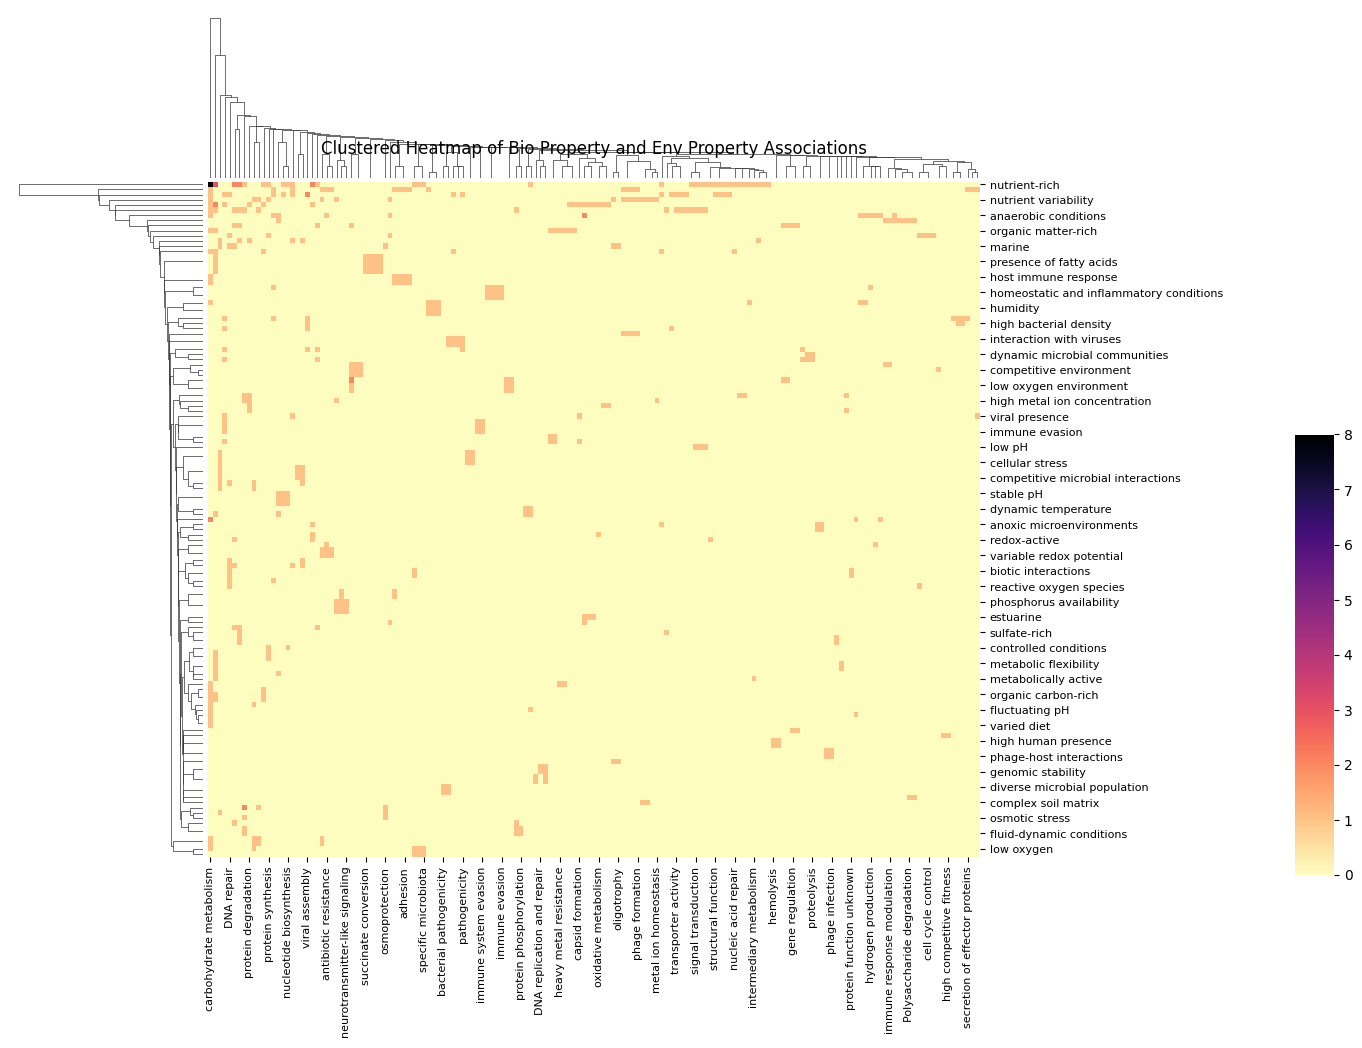

In [373]:
# Generate the clustered heatmap and save the clustering
plt.figure(figsize=(10, 8))
cluster_map = sns.clustermap(bio_env_matrix, metric="hamming", method="average", cmap='magma_r', figsize=(13, 11), cbar_pos=(1, 0.2, 0.03, 0.4))
cluster_map.ax_heatmap.set_xticklabels(cluster_map.ax_heatmap.get_xmajorticklabels(), fontsize=8)
cluster_map.ax_heatmap.set_yticklabels(cluster_map.ax_heatmap.get_ymajorticklabels(), fontsize=8)
cluster_map.ax_heatmap.set_title('Clustered Heatmap of Bio Property and Env Property Associations', pad=20)
plt.show()

In [374]:
# Save the clustering order
row_order = cluster_map.dendrogram_row.reordered_ind
col_order = cluster_map.dendrogram_col.reordered_ind

# Reorder the matrix based on clustering
bio_env_matrix_reordered = bio_env_matrix.iloc[row_order, col_order]

# Analyze the clustering to find clusters of > 0 values
clustered_pairs = {}
for i in range(len(bio_env_matrix_reordered)):
    for j in range(len(bio_env_matrix_reordered.columns)):
        if bio_env_matrix_reordered.iloc[i, j] >= 1:
            env_property = bio_env_matrix_reordered.index[i]
            bio_property = bio_env_matrix_reordered.columns[j]
            ecosystem_rows = llm_results_df_conf[
                llm_results_df_conf.apply(lambda row: env_property in row['env_property'].split('*') and bio_property in row['bio_property'].split('*'), axis=1)
            ]
            for _, row in ecosystem_rows.iterrows():
                ecosystem = row['ecosystem']
                if ecosystem not in clustered_pairs:
                    clustered_pairs[ecosystem] = []
                clustered_pairs[ecosystem].append((bio_property, env_property))

# Print the dictionary of clustered pairs
clustered_pairs

{'Engineered:Solid waste:Composting': [('carbohydrate metabolism',
   'nutrient-rich'),
  ('purine biosynthesis', 'nutrient-rich'),
  ('antibiotic production', 'dynamic temperature'),
  ('purine biosynthesis', 'dynamic temperature'),
  ('antibiotic production', 'organic-rich'),
  ('purine biosynthesis', 'organic-rich'),
  ('amino acid metabolism', 'high nitrogen content'),
  ('protein synthesis', 'high nitrogen content'),
  ('amino acid metabolism', 'thermophilic conditions'),
  ('protein synthesis', 'thermophilic conditions'),
  ('carbohydrate metabolism', 'fluctuating pH'),
  ('purine biosynthesis', 'fluctuating pH')],
 'Engineered:Wastewater': [('carbohydrate metabolism', 'nutrient-rich'),
  ('lactose catabolism', 'nutrient-rich'),
  ('viral assembly', 'microbial diversity'),
  ('pathogenicity', 'microbial diversity'),
  ('bacterial competition', 'anaerobic conditions'),
  ('amine catabolism', 'anaerobic conditions'),
  ('sulfate reduction', 'anaerobic conditions'),
  ('hydrogen pro

In [353]:
# Function to extract the last part of the ecosystem classification string
def get_last_part(ecosystem):
    return ecosystem.split(':')[-1]

# Extract row and column clusters
row_clusters = fcluster(cluster_map.dendrogram_row.linkage, t=1.15 * np.median(cluster_map.dendrogram_row.linkage[:, 2]), criterion='distance')
col_clusters = fcluster(cluster_map.dendrogram_col.linkage, t=1.15 * np.median(cluster_map.dendrogram_col.linkage[:, 2]), criterion='distance')

# Function to check cluster overlap condition
def check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
    row_cluster_size = np.sum(row_clusters == row_clusters[row_idx])
    col_cluster_size = np.sum(col_clusters == col_clusters[col_idx])

    overlap_rows = [i for i in range(len(row_clusters)) if row_clusters[i] == row_clusters[row_idx]]
    overlap_cols = [j for j in range(len(col_clusters)) if col_clusters[j] == col_clusters[col_idx]]

    overlap_row_count = len([r for r in overlap_rows if bio_env_matrix_reordered.iloc[r, col_idx] >= 1])
    overlap_col_count = len([c for c in overlap_cols if bio_env_matrix_reordered.iloc[row_idx, c] >= 1])

    row_overlap_percentage = overlap_row_count / row_cluster_size
    col_overlap_percentage = overlap_col_count / col_cluster_size

    return (row_overlap_percentage >= 0.5 and col_overlap_percentage >= 0.5 and
            ((overlap_row_count >= 2 and overlap_col_count >= 1) or (overlap_row_count >= 1 and overlap_col_count >= 2)))

# Annotate the heatmap with rectangles for the clustered pairs and add staggered ecosystem labels
ax = cluster_map.ax_heatmap

label_positions = {}
label_texts = defaultdict(set)

for ecosystem, pairs in clustered_pairs.items():
    short_ecosystem = get_last_part(ecosystem)
    for bio_property, env_property in pairs:
        row_idx = bio_env_matrix_reordered.index.get_loc(env_property)
        col_idx = bio_env_matrix_reordered.columns.get_loc(bio_property)

        if bio_env_matrix_reordered.iloc[row_idx, col_idx] >= 1:
            # Check if the pair overlaps with clusters from the dendrograms and meets the criteria
            if check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='blue', linewidth=0.7)
                rect.set_facecolor('blue')
                ax.add_patch(rect)
                label_texts[(col_idx, row_idx)].add(short_ecosystem)
            else:
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='red', linewidth=0.7)
                rect.set_facecolor('red')
                ax.add_patch(rect)
        else:
            rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='purple', linewidth=0.7)
            rect.set_facecolor('purple')
            ax.add_patch(rect)

# Ensure that every blue-marked area has an ecosystem label
visited = set()
for (col_idx, row_idx), ecosystems in label_texts.items():
    if (col_idx, row_idx) not in visited:
        unique_ecosystems = list(set(ecosystems))
        if len(unique_ecosystems) == 1:
            ecosystem = unique_ecosystems[0]
            contiguous_blocks = []
            stack = [(col_idx, row_idx)]
            while stack:
                current_col, current_row = stack.pop()
                if (current_col, current_row) not in visited:
                    visited.add((current_col, current_row))
                    contiguous_blocks.append((current_col, current_row))
                    # Check adjacent cells
                    for d_col, d_row in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        adj_col, adj_row = current_col + d_col, current_row + d_row
                        if (adj_col, adj_row) in label_texts and ecosystem in label_texts[(adj_col, adj_row)]:
                            stack.append((adj_col, adj_row))

            if contiguous_blocks:
                start_col_idx, start_row_idx = min(contiguous_blocks, key=lambda x: (x[1], x[0]))
                end_col_idx, end_row_idx = max(contiguous_blocks, key=lambda x: (x[1], x[0]))

                left_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (start_col_idx - 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, start_col_idx - 1] >= 1) if start_col_idx > 0 else float('inf')
                right_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (end_col_idx + 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, end_col_idx + 1] >= 1) if end_col_idx < bio_env_matrix_reordered.shape[1] - 1 else float('inf')

                if left_overlap < right_overlap:
                    ax.text(start_col_idx - 0.1, start_row_idx - 0.5, ecosystem, color='blue', fontsize=8, ha='right', va='center')
                else:
                    ax.text(end_col_idx + 1.1, start_row_idx - 0.5, ecosystem, color='blue', fontsize=8, ha='left', va='center')

# Adjust the axis labels font size
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set

<bound method Axes.set of <Axes: title={'center': 'Clustered Heatmap of Bio Property and Env Property Associations'}>>

/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


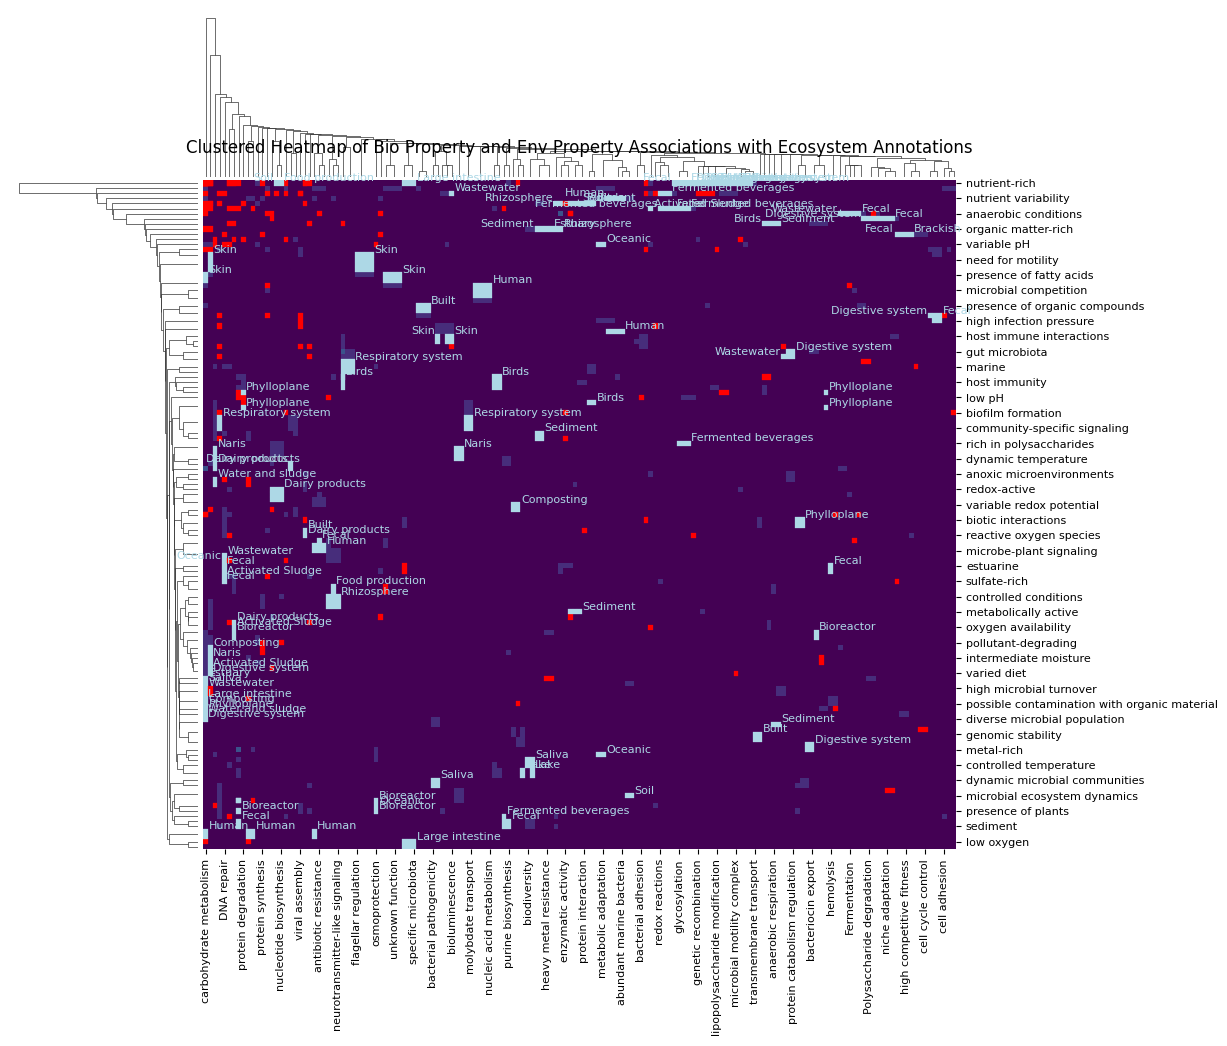

In [371]:
# Function to extract the last part of the ecosystem classification string
def get_last_part(ecosystem):
    return ecosystem.split(':')[-1]

# Generate the clustered heatmap
cluster_map = sns.clustermap(bio_env_matrix_reordered, metric="hamming", method="average", cmap='viridis', figsize=(13, 11), cbar_pos=None)

# Extract row and column clusters
row_clusters = fcluster(cluster_map.dendrogram_row.linkage, t=1.15 * np.median(cluster_map.dendrogram_row.linkage[:, 2]), criterion='distance')
col_clusters = fcluster(cluster_map.dendrogram_col.linkage, t=1.15 * np.median(cluster_map.dendrogram_col.linkage[:, 2]), criterion='distance')

# Function to check cluster overlap condition
def check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
    row_cluster_size = np.sum(row_clusters == row_clusters[row_idx])
    col_cluster_size = np.sum(col_clusters == col_clusters[col_idx])

    overlap_rows = [i for i in range(len(row_clusters)) if row_clusters[i] == row_clusters[row_idx]]
    overlap_cols = [j for j in range(len(col_clusters)) if col_clusters[j] == col_clusters[col_idx]]

    overlap_row_count = len([r for r in overlap_rows if bio_env_matrix_reordered.iloc[r, col_idx] >= 1])
    overlap_col_count = len([c for c in overlap_cols if bio_env_matrix_reordered.iloc[row_idx, c] >= 1])

    row_overlap_percentage = overlap_row_count / row_cluster_size
    col_overlap_percentage = overlap_col_count / col_cluster_size

    return (row_overlap_percentage >= 0.5 and col_overlap_percentage >= 0.5 and
            ((overlap_row_count >= 2 and overlap_col_count >= 1) or (overlap_row_count >= 1 and overlap_col_count >= 2)))

# Annotate the heatmap with rectangles for the clustered pairs and add staggered ecosystem labels
ax = cluster_map.ax_heatmap

label_positions = {}
label_texts = defaultdict(set)

for ecosystem, pairs in clustered_pairs.items():
    short_ecosystem = get_last_part(ecosystem)
    for bio_property, env_property in pairs:
        row_idx = bio_env_matrix_reordered.index.get_loc(env_property)
        col_idx = bio_env_matrix_reordered.columns.get_loc(bio_property)

        if bio_env_matrix_reordered.iloc[row_idx, col_idx] >= 1:
            # Check if the pair overlaps with clusters from the dendrograms and meets the criteria
            if check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='lightblue', linewidth=0.2)
                rect.set_facecolor('lightblue')
                ax.add_patch(rect)
                label_texts[(col_idx, row_idx)].add(short_ecosystem)
            else:
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='red', linewidth=0.2)
                rect.set_facecolor('red')
                ax.add_patch(rect)

# Ensure that every blue-marked area has an ecosystem label
visited = set()
for (col_idx, row_idx), ecosystems in label_texts.items():
    if (col_idx, row_idx) not in visited:
        unique_ecosystems = list(set(ecosystems))
        if len(unique_ecosystems) == 1:
            ecosystem = unique_ecosystems[0]
            contiguous_blocks = []
            stack = [(col_idx, row_idx)]
            while stack:
                current_col, current_row = stack.pop()
                if (current_col, current_row) not in visited:
                    visited.add((current_col, current_row))
                    contiguous_blocks.append((current_col, current_row))
                    # Check adjacent cells
                    for d_col, d_row in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        adj_col, adj_row = current_col + d_col, current_row + d_row
                        if (adj_col, adj_row) in label_texts and ecosystem in label_texts[(adj_col, adj_row)]:
                            stack.append((adj_col, adj_row))

            if contiguous_blocks:
                start_col_idx, start_row_idx = min(contiguous_blocks, key=lambda x: (x[1], x[0]))
                end_col_idx, end_row_idx = max(contiguous_blocks, key=lambda x: (x[1], x[0]))

                left_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (start_col_idx - 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, start_col_idx - 1] >= 1) if start_col_idx > 0 else float('inf')
                right_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (end_col_idx + 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, end_col_idx + 1] >= 1) if end_col_idx < bio_env_matrix_reordered.shape[1] - 1 else float('inf')

                if left_overlap < right_overlap:
                    ax.text(start_col_idx - 0.1, start_row_idx - 0.5, ecosystem, color='lightblue', fontsize=8, ha='right', va='center')
                else:
                    ax.text(end_col_idx + 1.1, start_row_idx - 0.5, ecosystem, color='lightblue', fontsize=8, ha='left', va='center')

# Adjust the axis labels font size
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)

plt.title('Clustered Heatmap of Bio Property and Env Property Associations with Ecosystem Annotations', pad=20)

# Save the plot to PNG and PDF files
plt.savefig('bio_env_heatmap.png', dpi=300)
plt.savefig('bio_env_heatmap.pdf')
plt.show()

/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/marcin/Documents/KBase/KE/KE/venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


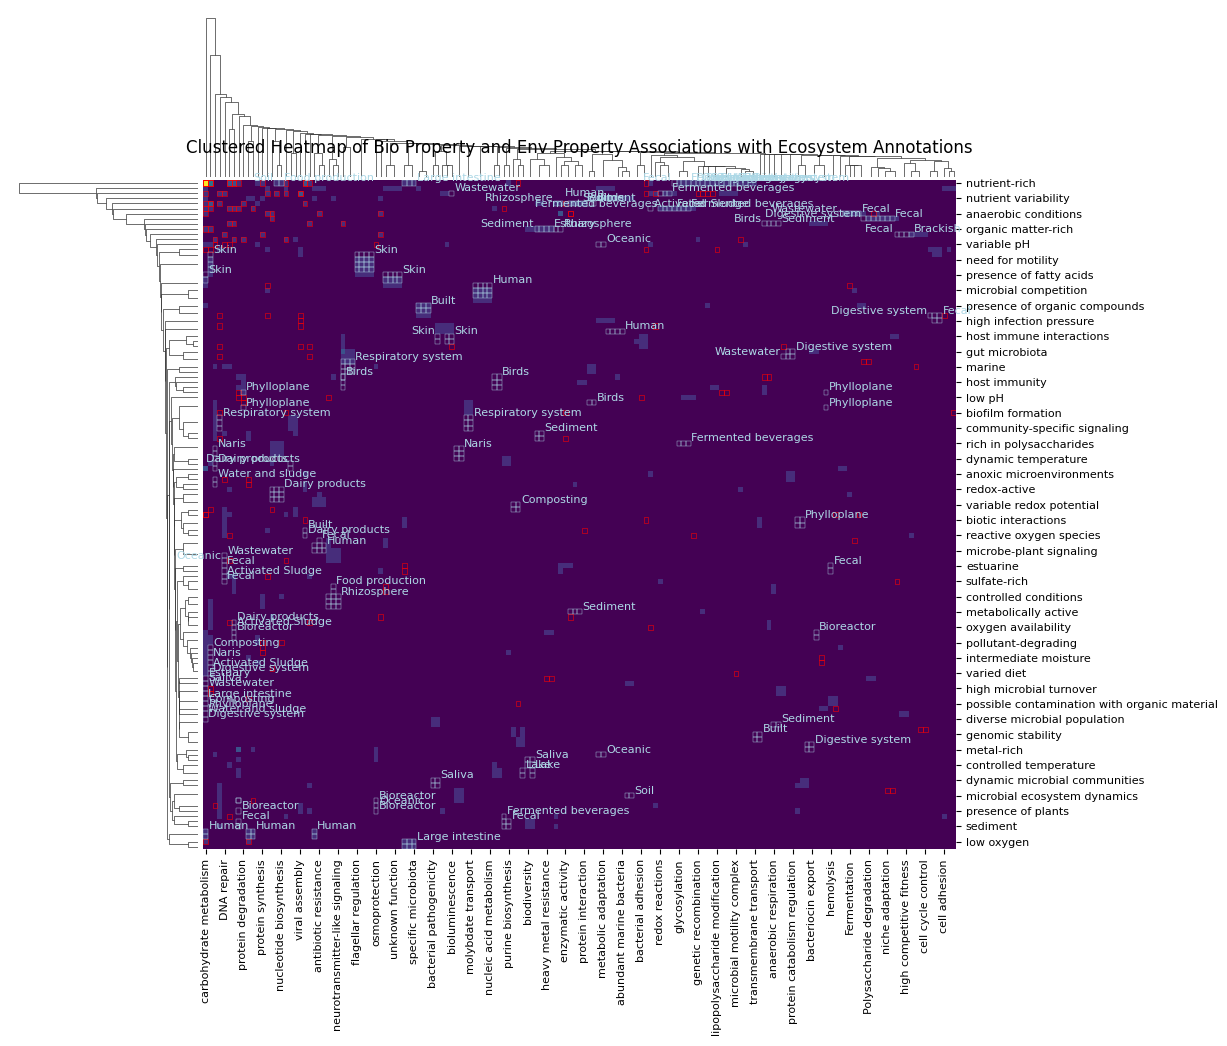

In [384]:
# Function to extract the last part of the ecosystem classification string
def get_last_part(ecosystem):
    return ecosystem.split(':')[-1]

# Generate the clustered heatmap
cluster_map = sns.clustermap(bio_env_matrix_reordered, metric="hamming", method="average", cmap='viridis', figsize=(13, 11), cbar_pos=None)

# Extract row and column clusters
row_clusters = fcluster(cluster_map.dendrogram_row.linkage, t=1.15 * np.median(cluster_map.dendrogram_row.linkage[:, 2]), criterion='distance')
col_clusters = fcluster(cluster_map.dendrogram_col.linkage, t=1.15 * np.median(cluster_map.dendrogram_col.linkage[:, 2]), criterion='distance')

# Function to check cluster overlap condition
def check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
    row_cluster_size = np.sum(row_clusters == row_clusters[row_idx])
    col_cluster_size = np.sum(col_clusters == col_clusters[col_idx])

    overlap_rows = [i for i in range(len(row_clusters)) if row_clusters[i] == row_clusters[row_idx]]
    overlap_cols = [j for j in range(len(col_clusters)) if col_clusters[j] == col_clusters[col_idx]]

    overlap_row_count = len([r for r in overlap_rows if bio_env_matrix_reordered.iloc[r, col_idx] >= 1])
    overlap_col_count = len([c for c in overlap_cols if bio_env_matrix_reordered.iloc[row_idx, c] >= 1])

    row_overlap_percentage = overlap_row_count / row_cluster_size
    col_overlap_percentage = overlap_col_count / col_cluster_size

    return (row_overlap_percentage >= 0.5 and col_overlap_percentage >= 0.5 and
            ((overlap_row_count >= 2 and overlap_col_count >= 1) or (overlap_row_count >= 1 and overlap_col_count >= 2)))

# Annotate the heatmap with rectangles for the clustered pairs and add staggered ecosystem labels
ax = cluster_map.ax_heatmap

label_positions = {}
label_texts = defaultdict(set)

for ecosystem, pairs in clustered_pairs.items():
    short_ecosystem = get_last_part(ecosystem)
    for bio_property, env_property in pairs:
        row_idx = bio_env_matrix_reordered.index.get_loc(env_property)
        col_idx = bio_env_matrix_reordered.columns.get_loc(bio_property)

        if bio_env_matrix_reordered.iloc[row_idx, col_idx] >= 1:
            # Check if the pair overlaps with clusters from the dendrograms and meets the criteria
            if check_cluster_overlap(row_idx, col_idx, row_clusters, col_clusters):
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='lightblue', facecolor='none', linewidth=0.3)
                ax.add_patch(rect)
                label_texts[(col_idx, row_idx)].add(short_ecosystem)
            else:
                rect = patches.Rectangle((col_idx, row_idx), 1, 1, fill=True, edgecolor='red', facecolor='none', linewidth=0.4)
                ax.add_patch(rect)

# Ensure that every blue-marked area has an ecosystem label
visited = set()
for (col_idx, row_idx), ecosystems in label_texts.items():
    if (col_idx, row_idx) not in visited:
        unique_ecosystems = list(set(ecosystems))
        if len(unique_ecosystems) == 1:
            ecosystem = unique_ecosystems[0]
            contiguous_blocks = []
            stack = [(col_idx, row_idx)]
            while stack:
                current_col, current_row = stack.pop()
                if (current_col, current_row) not in visited:
                    visited.add((current_col, current_row))
                    contiguous_blocks.append((current_col, current_row))
                    # Check adjacent cells
                    for d_col, d_row in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        adj_col, adj_row = current_col + d_col, current_row + d_row
                        if (adj_col, adj_row) in label_texts and ecosystem in label_texts[(adj_col, adj_row)]:
                            stack.append((adj_col, adj_row))

            if contiguous_blocks:
                start_col_idx, start_row_idx = min(contiguous_blocks, key=lambda x: (x[1], x[0]))
                end_col_idx, end_row_idx = max(contiguous_blocks, key=lambda x: (x[1], x[0]))

                left_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (start_col_idx - 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, start_col_idx - 1] >= 1) if start_col_idx > 0 else float('inf')
                right_overlap = sum(1 for i in range(start_row_idx, end_row_idx + 1) if (end_col_idx + 1, i) in label_texts or bio_env_matrix_reordered.iloc[i, end_col_idx + 1] >= 1) if end_col_idx < bio_env_matrix_reordered.shape[1] - 1 else float('inf')

                if left_overlap < right_overlap:
                    ax.text(start_col_idx - 0.1, start_row_idx - 0.5, ecosystem, color='lightblue', fontsize=8, ha='right', va='center')
                else:
                    ax.text(end_col_idx + 1.1, start_row_idx - 0.5, ecosystem, color='lightblue', fontsize=8, ha='left', va='center')

# Adjust the axis labels font size
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)

plt.title('Clustered Heatmap of Bio Property and Env Property Associations with Ecosystem Annotations', pad=20)

# Save the plot to PNG and PDF files
plt.savefig('bio_env_heatmap.png', dpi=300)
plt.savefig('bio_env_heatmap.pdf')
plt.show()
